In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_data = nib.load('../images/1/T1.nii.gz')

In [6]:
image = image_data.get_fdata()

In [7]:
tol = 1
tau = 150
k1 = np.amin(image)
k2 = np.mean(image)
k3 = np.amax(image)
print(k1, k2, k3)

for i in range(0,3):
  d1 = np.abs(k1 - image)
  d2 = np.abs(k2 - image)
  d3 = np.abs(k3 - image)

  segmentation = np.zeros_like(image)
  segmentation[np.multiply(d1 < d2, d1 < d3)] = 0
  segmentation[np.multiply(d2 < d1, d2 < d3)] = 1
  segmentation[np.multiply(d3 < d1, d3 < d2)] = 2

  k1 = image[segmentation == 0].mean()
  k2 = image[segmentation == 1].mean()
  k3 = image[segmentation == 2].mean()

  print(k1,k2,k3)


0.0 33.81131410090389 627.563720703125
0.6761046042045307 110.6270442444566 399.8617152975063
2.998638533179162 124.71570954182386 304.74827125873657
3.7517439407934865 125.02725703084612 255.0617794523566


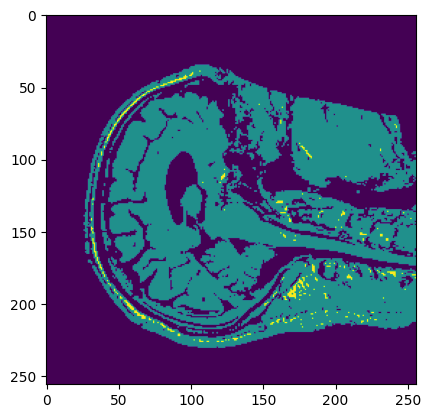

In [8]:
plt.imshow(segmentation[:, :, 100])

(array([8.699143e+06, 2.718740e+05, 2.069920e+05, 1.875830e+05,
        1.905550e+05, 2.144060e+05, 2.639350e+05, 3.568740e+05,
        4.348990e+05, 3.885990e+05, 2.888900e+05, 2.196340e+05,
        1.911480e+05, 2.354330e+05, 2.033160e+05, 7.892200e+04,
        4.449300e+04, 3.173400e+04, 2.188500e+04, 1.531500e+04,
        1.042300e+04, 7.167000e+03, 4.978000e+03, 3.318000e+03,
        2.421000e+03, 1.657000e+03, 1.221000e+03, 9.900000e+02,
        7.440000e+02, 5.950000e+02, 5.020000e+02, 5.170000e+02,
        4.350000e+02, 4.110000e+02, 3.340000e+02, 2.670000e+02,
        2.630000e+02, 2.300000e+02, 1.840000e+02, 1.460000e+02,
        1.180000e+02, 8.500000e+01, 7.100000e+01, 5.800000e+01,
        4.600000e+01, 3.600000e+01, 3.400000e+01, 1.800000e+01,
        1.100000e+01, 2.000000e+00]),
 array([  0.        ,  12.55127441,  25.10254883,  37.65382324,
         50.20509766,  62.75637207,  75.30764648,  87.8589209 ,
        100.41019531, 112.96146973, 125.51274414, 138.06401855,
  

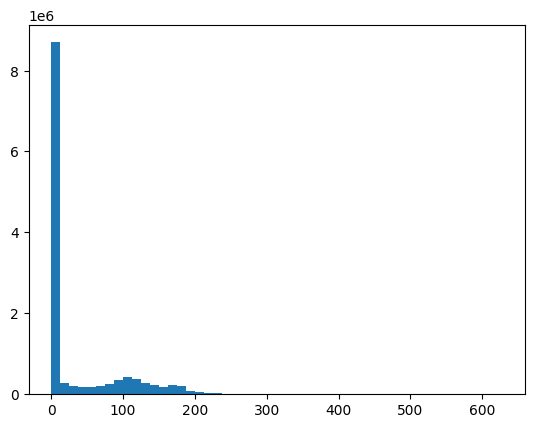

In [9]:
plt.hist(image.flatten(), 50)